In [ ]:
import pandas   as pd
import numpy    as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import random
from sklearn.model_selection import cross_val_score
from scipy.stats import sem
import numpy.linalg as LA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import jax.numpy as jnp
from jax import grad
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("Q2.csv")
df

,transactiondate,age,nearestMRT,nConvenience,latitude,longitude,price
0,2012.917,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5.0,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0.0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9.0,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7.0,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5.0,24.96674,121.54067,52.5


In [ ]:
def get_cond(xk):
    grad = get_gradient(xk)
    return LA.norm(grad)

def get_gradient(x):
    A = np.array(
        [[1,0,1,-1],
        [-1,1,0,2],
        [0,-1,-2,1]])
    b = np.array([1,2,3])

    AtA = np.matmul(np.transpose(A), A)
    Atb = np.matmul(np.transpose(A), b)

    grad = (-Atb + np.matmul(AtA, x))
    return grad

def calc_gradient_descent(x0, step):
    results = []
    cond = get_cond(x0)

    results.append([0, x0])

    k = 1
    xk = x0

    while(cond >= 0.001):
        grad = get_gradient(xk)
        grad_desc = xk-step * grad
        results.append([k, grad_desc])

        cond = get_cond(grad_desc)
        xk = grad_desc
        k += 1
    return results

In [ ]:
x0 = np.array([1,1,1,1])
step = 0.1
res = calc_gradient_descent(x0, step)
for num in res[0:5]:
    print('k=', str(num[0]) + '         '  + 'x(k) = ', str(num[1]))
for num in res[-5:]:
    print('k=', str(num[0]) + '       '  + 'x(k) = ', str(num[1]))

k= 0         x(k) =  [1 1 1 1]
k= 1         x(k) =  [1.  0.5 0.  1.5]
k= 2         x(k) =  [ 1.2   0.25 -0.25  1.45]
k= 3         x(k) =  [ 1.345  0.125 -0.36   1.44 ]
k= 4         x(k) =  [ 1.4565  0.0625 -0.4075  1.459 ]
k= 218       x(k) =  [ 3.99699850e+00 -6.82054860e-17 -5.61531549e-04  2.99812156e+00]
k= 219       x(k) =  [ 3.99709142e+00 -6.82054860e-17 -5.44147417e-04  2.99817971e+00]
k= 220       x(k) =  [ 3.99718146e+00 -1.12614407e-16 -5.27301471e-04  2.99823607e+00]
k= 221       x(k) =  [ 3.99726872e+00 -6.82054860e-17 -5.10977048e-04  2.99829068e+00]
k= 222       x(k) =  [ 3.99735328e+00 -1.12614407e-16 -4.95158004e-04  2.99834359e+00]


In [ ]:
A = np.array(
        [[1,0,1,-1],
        [-1,1,0,2],
        [0,-1,-2,1]])
b = np.array([1,2,3])

At = np.transpose(A)
AtA = np.matmul(At, A)
AtB = np.matmul(At, b)
BtA = np.matmul(np.transpose(b), A)

def calc_step(xk):
    fxk = get_gradient(xk)
    fxkt = np.transpose(fxk)
    sec_one = np.matmul(np.matmul(np.transpose(xk), AtA), fxk)
    sec_two = np.matmul(np.matmul(fxkt, AtA),xk)
    sec_three = np.matmul(BtA, fxk)
    numerator = sec_one + sec_two - 2*sec_three
    denominator = np.matmul(np.matmul(fxkt, AtA), fxk)
    ak = numerator/(2*denominator) 
    return ak

def calc_steepest_descent(x0, step):
    results = []
    cond = get_cond(x0)

    results.append([0, x0])
    steps = {}
    k = 1
    xk = x0

    while(cond >= 0.001):
        grad = get_gradient(xk)
        step = calc_step(xk)
        steps[k] = step
        grad_desc = xk-step * grad
        results.append([k, grad_desc])

        cond = get_cond(grad_desc)
        xk = grad_desc
        k += 1
    print("Total Iterations: ", k)
    return results, steps

Total Iterations:  114


[Text(0, 0.5, '$\\alpha_{k}$')]

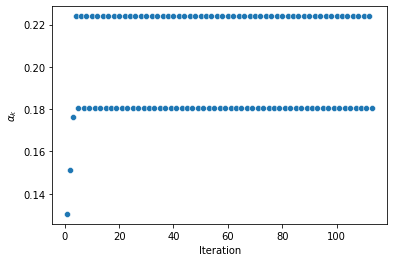

In [ ]:
x0 = np.array([1,1,1,1])
step = 0.1

res, ak = calc_steepest_descent(x0, step)
ak_df = pd.DataFrame(data=ak.items(), columns=['Iteration','ak'])
ax = sns.scatterplot(data=ak_df, x="Iteration", y="ak")
ax.set(ylabel=r'$\alpha_{k}$')

In [ ]:
for num in res[0:5]:
    print('k=', str(num[0]) + '         '  + 'x(k) = ', str(num[1]))
for num in res[-5:]:
    print('k=', str(num[0]) + '       '  + 'x(k) = ', str(num[1]))

k= 0         x(k) =  [1 1 1 1]
k= 1         x(k) =  [ 1.          0.34782609 -0.30434783  1.65217391]
k= 2         x(k) =  [ 1.39494706  0.08452804 -0.33726008  1.32305136]
k= 3         x(k) =  [ 1.50092477  0.01000748 -0.49745676  1.52586073]
k= 4         x(k) =  [ 1.74348592e+00 -1.19743517e-03 -3.75654918e-01  1.49120345e+00]
k= 109       x(k) =  [ 3.99737876e+00 -4.88880553e-17 -5.33380212e-04  2.99844552e+00]
k= 110       x(k) =  [ 3.99762774e+00 -1.48281994e-16 -3.93561204e-04  2.99841486e+00]
k= 111       x(k) =  [ 3.99769691e+00 -6.80059892e-17 -4.68641603e-04  2.99863420e+00]
k= 112       x(k) =  [ 3.99791567e+00 -1.67399928e-16 -3.45793018e-04  2.99860726e+00]
k= 113       x(k) =  [ 3.99797645e+00 -8.71239232e-17 -4.11760592e-04  2.99879997e+00]


In [ ]:
df = pd.read_csv("Q2.csv")
df

,transactiondate,age,nearestMRT,nConvenience,latitude,longitude,price
0,2012.917,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5.0,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0.0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9.0,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7.0,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5.0,24.96674,121.54067,52.5


In [ ]:
df = df.dropna()

In [ ]:
x_df = df.drop(columns=['transactiondate','latitude','longitude','price'])

In [ ]:
y_df = df[["price"]]

In [ ]:
scaler = MinMaxScaler()
scaled_x_df = scaler.fit_transform(x_df)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x_df, y_df, test_size=0.5, shuffle=False)

In [ ]:
x_data = x_train
x_data = pd.DataFrame(x_data)
x_data["1"] = 1

x_data = jnp.asarray(x_data)
y_data = jnp.asarray(y_train)

w0 = jnp.array([1,1,1,1])
print(w0.shape[0])
initial_step = 1

4


In [ ]:
x0 = jnp.asarray(x_data)
print(x0.shape[0])

204


In [ ]:
def loss_func(x,y,w):
    WtX = jnp.matmul(jnp.transpose(w), x)
    sqrt_loss = 0.25*((y-WtX)**2)
    sqrt_loss += 1
    loss = jnp.sqrt(sqrt_loss)
    loss -= 1
    return jnp.sum(loss)

def get_loss(x,y,w):
    k = x.shape[0]
    losses = []
    res = []
    for i in range(k):
        loss = grad(loss_func)(x[i],y[i],w)
        losses.append(loss)
    res = jnp.mean(jnp.array(losses))
    return res
def get_d_cond(x,y,w):
    k = x.shape[0]
    losses = []
    res = []
    for i in range(k):
        loss = loss_func(x[i],y[i],w)
        losses.append(loss)
    res = jnp.mean(jnp.array(losses))
    return res

In [ ]:
def gradient_descent_train(w, x, y, step=1,termination_val=0.0001):
    results = {}
    converged = False
    wk = w
    k=0
    conds = {}
    while converged is False:
        grad_loss = get_loss(x, y, wk)
        grad_desc = wk - step * grad_loss
        results[k] = grad_desc
        prev_cond = get_d_cond(x,y,wk)
        cond = abs(get_d_cond(x, y, grad_desc) - prev_cond)
        if cond <= termination_val:
            converged=True
        conds[k] = float(np.asarray(prev_cond))
        #print("Iteration: ", k)
        # Gradient is currently on the ascent instead of the descent
        #print("weight_diff: ", jnp.mean(cond))
        #print("ak: ", conds[k])
        wk = grad_desc
        k+=1
    print("N Iterations :", k-1)
    return results, wk, conds

res, final_w, aks = gradient_descent_train(w0, x_data, y_data, initial_step)
print("Final Weight: ", final_w)
print("Results: ", res)
print(r'$\alpha_{k}:$', aks)

Iteration:  0
weight_diff:  0.49603844
ak:  17.234569549560547
Iteration:  1
weight_diff:  0.7424154
ak:  16.7385311126709
Iteration:  2
weight_diff:  1.1084194
ak:  15.996115684509277
Iteration:  3
weight_diff:  1.6293726
ak:  14.887696266174316
Iteration:  4
weight_diff:  2.2573948
ak:  13.258323669433594
Iteration:  5
weight_diff:  2.6813831
ak:  11.00092887878418
Iteration:  6
weight_diff:  2.2563105
ak:  8.31954574584961
Iteration:  7
weight_diff:  0.5544162
ak:  6.063235282897949
Iteration:  8
weight_diff:  0.020231724
ak:  5.508819103240967
Iteration:  9
weight_diff:  0.0032348633
ak:  5.529050827026367
Iteration:  10
weight_diff:  0.00046157837
ak:  5.532285690307617
Iteration:  11
weight_diff:  6.4373016e-05
ak:  5.532747268676758
N Iterations : 11
Final Weight:  [18.337734 18.337734 18.337734 18.337734]
Results:  {0: DeviceArray([1.4985166, 1.4985166, 1.4985166, 1.4985166], dtype=float32), 1: DeviceArray([2.2452118, 2.2452118, 2.2452118, 2.2452118], dtype=float32), 2: DeviceA

In [ ]:
aks_df = pd.DataFrame(data=aks.items(), columns=["Iterations","ak"])
aks_df

,Iterations,ak
0,0,17.234570
1,1,16.738531
2,2,15.996116
3,3,14.887696
4,4,13.258324
5,5,11.000929
6,6,8.319546
7,7,6.063235
8,8,5.508819
9,9,5.529051


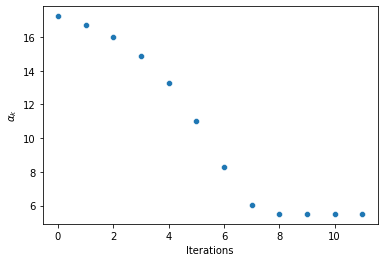

In [ ]:
ax = sns.scatterplot(data=aks_df, x="Iterations", y="ak")
ax.set(ylabel="loss")
plt.show()

In [ ]:
training_loss = float(np.asarray(get_d_cond(x_data,y_data, final_w)))
print("Training Loss: ",training_loss)

Training Loss:  5.532811641693115


In [ ]:
x_test_data = x_test
x_test_data = pd.DataFrame(x_test_data)
x_test_data["1"] = 1

x_test_data = jnp.asarray(x_test_data)
y_test_data = jnp.asarray(y_test)

initial_step = 1

In [ ]:
testing_loss = float(np.asarray(get_d_cond(x_test_data, y_test_data, final_w)))
print("Testing loss: ", testing_loss)

Testing loss:  5.052703857421875
